In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

df = pd.read_csv("csv 파일") # csv 데이터셋 
df.head()

,rating,text
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입..."
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...


In [19]:
df.describe()

,rating
count,1001.000000
mean,3.926074
std,1.157812
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [20]:
#dimension
df.shape

(1001, 2)

In [21]:
#결측치
df.isnull().sum()

rating    0
text      0
dtype: int64

In [22]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1001 non-null   int64 
 1   text    1001 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [23]:
df['text'][0]

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다.'

In [18]:
import re

def apply_regular_expression(text):
     hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
     result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
     return result



In [19]:
apply_regular_expression(df['text'][0])

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다'

In [20]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()


In [21]:
apply_regular_expression(df['text'][0])

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다'

In [22]:
nouns = okt.nouns(apply_regular_expression(df['text'][0]))
nouns


['여행', '집중', '휴식', '제공', '호텔', '위치', '선정', '또한', '청소', '청결', '상태']

In [23]:
# 말뭉치 생성
corpus = "".join(df['text'].tolist())
corpus


'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다.2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입니다. 베스트 웨스턴 회원의 경우 객실 뷰와 층수 요청에 적극적으로 반영해 주시길 바랍니다.지인에소개로온 호텔  깨끗하고 좋은거같아요 처음에는 없는게 많아 많이  당황했는데 알고오시면 좋을거같아요 (세면도구와  잠옷은필수로챙기셔야해용) 그것만챙겨오시면 잘쉬었다가실수있답니당방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!! 다음에도 제주도 오면 꼭 여기서 지낼겁니다ㅎㅎ 1박만 머문다는게 너무 아쉽네요ㅠㅠ저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버스정류이 있어서 너무 좋았습니다. 12시에 도착해서 가방 맡기려 했는데 일찍 정비된방이 있다며 바로 입실하고 룸도 업그레이드 해주셔서 직원분이 친절해 정말 좋았어요^^바다전망이라해서 기대했는데 영아니네요.. 전일 함덕대명콘도에서 1박했는데 그곳이 실내 분위기랑 바다전망이 훨 좋아요..손님이 없는 날이라고 가장 바다가 이쁘게 보이는 방으로 배치해 주셨다. 불편함에 대해 바로 대응 써비스 해주었고 조식도 사소한 부분까지 신경써서 아주 맛있었다. 특급 호텔은 아니지만 트랜디하고 즐거운 다양함에 대해 고민한 흔적이 였보인다. 여름에 꼭와서 수영장을 사용해 보고 싶다 ~ !엄마와 둘이 여행왔다가 가격대비 좋다고 하여 다녀왔어요 ㅎㅎ 듣던대로 깔끔했고 위치도 너무 좋았어요 주위 마트 식당들 동문시장도 가까워서 좋았고 앞에 바다가 있어서 더 좋았습니다 ㅎㅎ 또 방문의사 있어요 ~딸 둘과의 4일동안의 제주여행줌 2박 숙소로 정해진 제주 휘슬락 호텔~ 처음엔 공항과 가까운 곳으로만 생각했으나 시설도 넘 깨끗하고 직원분들도 모두 친절모드로 제주여행의 마지막을 넘넘 좋게 마무리하고 돌아가네요~~^^ 테라스에서 보이는 전경도 넘 멋지네요♡ 인근 동문재래시장도 가까워 야시

In [24]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다일 이상 연박시 침대 이불 베게등 침구류 교체 및 어메니티 보강이 필요해 보입니다 베스트 웨스턴 회원의 경우 객실 뷰와 층수 요청에 적극적으로 반영해 주시길 바랍니다지인에소개로온 호텔  깨끗하고 좋은거같아요 처음에는 없는게 많아 많이  당황했는데 알고오시면 좋을거같아요 세면도구와  잠옷은필수로챙기셔야해용 그것만챙겨오시면 잘쉬었다가실수있답니당방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요 다음에도 제주도 오면 꼭 여기서 지낼겁니다ㅎㅎ 박만 머문다는게 너무 아쉽네요ㅠㅠ저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버스정류이 있어서 너무 좋았습니다 시에 도착해서 가방 맡기려 했는데 일찍 정비된방이 있다며 바로 입실하고 룸도 업그레이드 해주셔서 직원분이 친절해 정말 좋았어요바다전망이라해서 기대했는데 영아니네요 전일 함덕대명콘도에서 박했는데 그곳이 실내 분위기랑 바다전망이 훨 좋아요손님이 없는 날이라고 가장 바다가 이쁘게 보이는 방으로 배치해 주셨다 불편함에 대해 바로 대응 써비스 해주었고 조식도 사소한 부분까지 신경써서 아주 맛있었다 특급 호텔은 아니지만 트랜디하고 즐거운 다양함에 대해 고민한 흔적이 였보인다 여름에 꼭와서 수영장을 사용해 보고 싶다  엄마와 둘이 여행왔다가 가격대비 좋다고 하여 다녀왔어요 ㅎㅎ 듣던대로 깔끔했고 위치도 너무 좋았어요 주위 마트 식당들 동문시장도 가까워서 좋았고 앞에 바다가 있어서 더 좋았습니다 ㅎㅎ 또 방문의사 있어요 딸 둘과의 일동안의 제주여행줌 박 숙소로 정해진 제주 휘슬락 호텔 처음엔 공항과 가까운 곳으로만 생각했으나 시설도 넘 깨끗하고 직원분들도 모두 친절모드로 제주여행의 마지막을 넘넘 좋게 마무리하고 돌아가네요 테라스에서 보이는 전경도 넘 멋지네요 인근 동문재래시장도 가까워 야시장 이용도하고 너무너무 잘다녀왔어요 다음에 또 이용할께요제주여행 

In [25]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['여행', '집중', '휴식', '제공', '호텔', '위치', '선정', '또한', '청소', '청결', '상태', '일', '이상', '연', '침대', '이불', '등', '침구', '류', '교체', '및', '어메니티', '보강', '베스트', '웨스턴', '회원', '경우', '객실', '뷰', '층수', '요청', '적극', '반영', '지인', '소개', '온', '호텔', '거', '처음', '당황', '세면', '도구', '잠옷', '필수', '그것', '방', '눈', '정도', '호텔', '처음', '것', '다음', '제주도', '꼭', '여기', '박만', '저녁', '맥주', '한잔', '렌트', '안', '뚜벅', '호텔', '바로', '앞', '버스', '정류', '시', '도착', '가방', '일찍', '정비', '방이', '바로', '입실', '룸', '업그레이드', '직원', '정말', '바다', '전망', '영', '전일', '함덕', '대명', '콘도', '곳', '실내', '분위기', '바다', '전망', '훨', '손님', '날', '가장', '바다', '방', '배치', '대해', '바로', '대응', '써비스', '조식', '부분', '신경', '아주', '특급', '호텔', '트랜디', '대해', '고민', '흔적', '여름', '꼭', '수영장', '사용', '보고', '엄마', '둘', '여행', '가격', '대비', '위치', '주위', '마트', '식당', '시장', '앞', '바다', '더', '또', '방문', '의사', '딸', '둘', '동안', '제주', '여행', '줌', '박', '숙소', '정해진', '제주', '휘슬', '락', '호텔', '처음', '공항', '곳', '생각', '시설', '직원', '모두', '친절', '모드', '여행', '마지막', '마무리', '테라스', '전경', '인근', '재래시장', '야시장', '이용도', '다음', '또', '이용', '제주', '여행'

In [26]:
# 빈도 탐색
counter = Counter(nouns)

In [27]:
counter.most_common(10)

[('호텔', 803),
 ('수', 498),
 ('것', 436),
 ('방', 330),
 ('위치', 328),
 ('우리', 327),
 ('곳', 320),
 ('공항', 307),
 ('직원', 267),
 ('매우', 264)]

In [28]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)


[('호텔', 803),
 ('위치', 328),
 ('우리', 327),
 ('공항', 307),
 ('직원', 267),
 ('매우', 264),
 ('가격', 245),
 ('객실', 244),
 ('시설', 215),
 ('제주', 192)]

In [29]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]


[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [30]:
jeju_hotel_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']
for word in jeju_hotel_stopwords:
    stopwords.append(word)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['text'].tolist())
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)


C:\Program Files\Python38\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [32]:
# 단어 리스트
word_list

array(['가가', '가게', '가격', ..., '희망', '히터', '힐링'], dtype=object)

In [33]:
# 각 단어전체 리뷰중 등장한 총 횟수
count_list

array([  4,   8, 245, ...,   1,   7,  14], dtype=int64)

In [34]:
# 각 단어 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
bow_vect.shape

(1001, 3599)

In [36]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict


{'가가': 4,
 '가게': 8,
 '가격': 245,
 '가격표': 1,
 '가구': 8,
 '가급': 1,
 '가기': 20,
 '가까이': 20,
 '가끔': 5,
 '가능': 10,
 '가도': 7,
 '가동': 2,
 '가두': 1,
 '가득': 2,
 '가든': 1,
 '가라': 3,
 '가량': 1,
 '가려움': 1,
 '가로': 2,
 '가면': 14,
 '가몬': 1,
 '가무': 1,
 '가물': 1,
 '가미': 1,
 '가방': 4,
 '가버': 1,
 '가성': 49,
 '가세': 3,
 '가스레인지': 1,
 '가스렌지': 1,
 '가슴': 1,
 '가시': 4,
 '가신': 3,
 '가야': 10,
 '가옥': 1,
 '가요': 5,
 '가용': 1,
 '가운데': 3,
 '가을': 4,
 '가인': 1,
 '가장': 42,
 '가정': 4,
 '가정식': 2,
 '가족': 94,
 '가지': 55,
 '가짓수': 3,
 '가차': 1,
 '가치': 15,
 '가품': 1,
 '각각': 7,
 '각오': 1,
 '각자': 2,
 '각종': 3,
 '각층': 1,
 '간격': 2,
 '간곳': 1,
 '간다': 4,
 '간단': 1,
 '간만': 1,
 '간식': 5,
 '간이': 3,
 '간주': 1,
 '간직': 1,
 '간판': 2,
 '간혹': 1,
 '갈껄': 1,
 '갈비': 1,
 '갈비탕': 1,
 '갈수': 7,
 '갈수록': 1,
 '감각': 1,
 '감동': 12,
 '감명': 1,
 '감사': 6,
 '감상': 3,
 '감소': 1,
 '감안': 5,
 '감자': 1,
 '감히': 1,
 '갑인': 1,
 '갑자기': 4,
 '갑작스레': 1,
 '강남': 1,
 '강력': 9,
 '강아지': 7,
 '강압': 2,
 '강제': 1,
 '강조': 1,
 '강추': 8,
 '개념': 1,
 '개략': 1,
 '개미': 1,
 '개발': 3,
 '개방': 2,
 '개별': 3,
 '개보': 1,
 '개뿔': 1,


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [38]:
print(tf_idf_vect.shape)

(1001, 3599)


In [39]:
print(tf_idf_vect[0])

  (0, 3588)	0.35673213299026796
  (0, 2927)	0.2582351368959594
  (0, 2925)	0.320251680858207
  (0, 2866)	0.48843555212083145
  (0, 2696)	0.23004450213863206
  (0, 2311)	0.15421663035331626
  (0, 1584)	0.48843555212083145
  (0, 1527)	0.2928089229786031
  (0, 790)	0.2528176728459411


In [40]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 3599)
[[0. 0. 0. ... 0. 0. 0.]]


In [41]:
vect.vocabulary_

{'집중': 2866,
 '휴식': 3588,
 '제공': 2696,
 '위치': 2311,
 '선정': 1584,
 '또한': 790,
 '청소': 2927,
 '청결': 2925,
 '상태': 1527,
 '이상': 2392,
 '침대': 3022,
 '이불': 2388,
 '침구': 3021,
 '교체': 299,
 '어메니티': 2013,
 '보강': 1296,
 '베스트': 1277,
 '웨스턴': 2299,
 '회원': 3564,
 '경우': 185,
 '객실': 106,
 '층수': 3009,
 '요청': 2234,
 '적극': 2606,
 '반영': 1188,
 '지인': 2837,
 '소개': 1629,
 '처음': 2910,
 '당황': 611,
 '세면': 1607,
 '도구': 675,
 '잠옷': 2555,
 '필수': 3358,
 '그것': 361,
 '정도': 2673,
 '다음': 578,
 '여기': 2074,
 '박만': 1171,
 '저녁': 2595,
 '맥주': 981,
 '한잔': 3414,
 '렌트': 838,
 '뚜벅': 791,
 '바로': 1159,
 '버스': 1247,
 '정류': 2676,
 '도착': 697,
 '가방': 24,
 '일찍': 2487,
 '정비': 2685,
 '방이': 1225,
 '입실': 2500,
 '업그레이드': 2038,
 '직원': 2849,
 '정말': 2680,
 '바다': 1148,
 '전망': 2623,
 '전일': 2636,
 '함덕': 3425,
 '대명': 624,
 '콘도': 3091,
 '실내': 1861,
 '분위기': 1384,
 '손님': 1659,
 '가장': 40,
 '배치': 1241,
 '대해': 651,
 '대응': 634,
 '써비스': 1889,
 '조식': 2730,
 '부분': 1351,
 '신경': 1838,
 '아주': 1922,
 '특급': 3208,
 '트랜디': 3191,
 '고민': 210,
 '흔적': 3593,
 '여름': 20

In [42]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{2866: '집중', 3588: '휴식', 2696: '제공', 2311: '위치', 1584: '선정', 790: '또한', 2927: '청소', 2925: '청결', 1527...


In [43]:
df.sample(10)

,rating,text
556,5,제주도에 갔을 때 여기에 머물렀는데 방이 깨끗하고 넓어서 좋았어요!! 조식도 맛있게...
290,4,협재해수욕장과 한림공원이 매우 가까워 위치적으로는 매우 좋으나 난방이 살짝 아쉬웠음...
618,3,"40 객실을 갖춘, 평범한 서비스는 평범한 호텔입니다. 서비스: 제가 예약한 호..."
820,5,"시설도 깨끗하고, 공항에서 가까워용~ 방에는 각자 락커가 있어서 짐 보관에 용이하구..."
644,4,距離機場不遠，乘坐的士大概7000韓元，7美金吧。 自己駕車的話也很好找，停車場空曠，易停。...
399,2,"우리가 본 방과 그 밖의 모든 것이 깨끗했습니다. 접수는 때때로 결석 했습니다만, ..."
574,4,호스트는 아주 친절하고 도움이 되었습니다. 그는 우리를 픽업해서 근처에 있는 동안 ...
899,4,바다에서는 좀 떨어져 있지만 걷는게 엄청 싫지 않다면 문제 없는 호텔입니다. 시장과...
496,4,"첨단 기술 어느하나는 컨트롤러로 제어할 수 있어서 굉장히 놀라 조명, 에어컨 & t..."
933,5,우리는 2 개의 밤 동안 여기에서 머물렀다. 그리고 나는 장소를 소유하고있는 것처럼...


C:\Users\roger\AppData\Local\Temp\ipykernel_17576\560952562.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])


<Axes: xlabel='rating', ylabel='Density'>

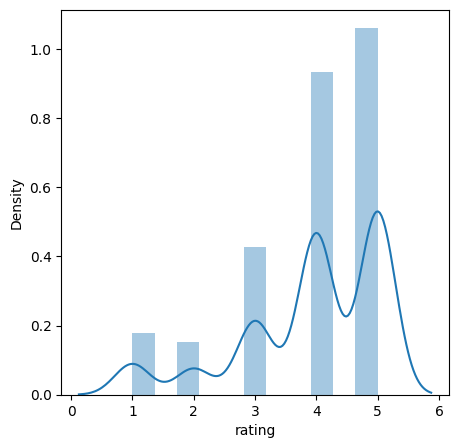

In [44]:
plt.figure(figsize=(5,5))
sns.distplot(df['rating'])

<Axes: >

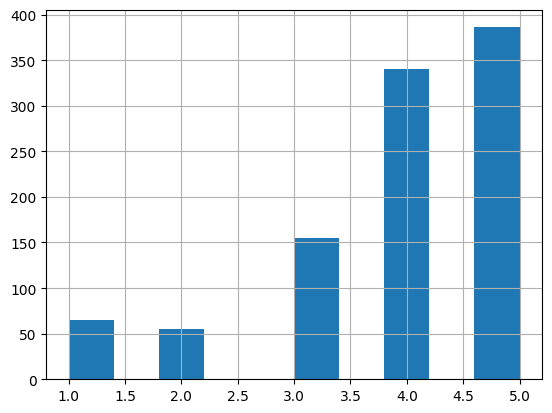

In [45]:
df['rating'].hist()

In [46]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))



In [47]:
df.head()

,rating,text,y
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...,1
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입...",1
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...,1
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...,1
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...,1


In [48]:
df["y"].value_counts()

y
1    726
0    275
Name: count, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [50]:
x_train.shape, y_train.shape

((700, 3599), (700,))

In [51]:
x_test.shape, y_test.shape

((301, 3599), (301,))

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [53]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.72
precision: 0.72
recall: 1.00
F1: 0.84


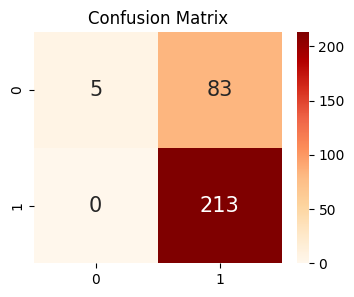

In [54]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [55]:
df['y'].value_counts()

y
1    726
0    275
Name: count, dtype: int64

In [56]:
positive_random_idx = df[df['y']==1].sample(275, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(275, random_state=12).index.tolist()


In [57]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)



In [58]:
x_train.shape, y_train.shape

((412, 3599), (412,))

In [59]:
x_test.shape, y_test.shape

((138, 3599), (138,))

In [60]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)


In [61]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.72
precision: 0.70
recall: 0.74
F1: 0.72


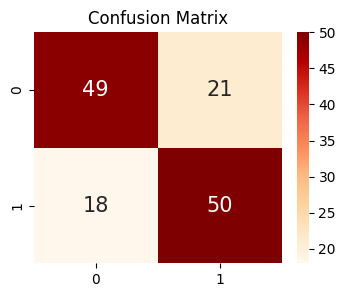

In [62]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


In [63]:
lr2.coef_

array([[ 0.28196772,  0.10796991, -0.04978601, ...,  0.        ,
        -0.18315162,  0.28434689]])

<BarContainer object of 3599 artists>

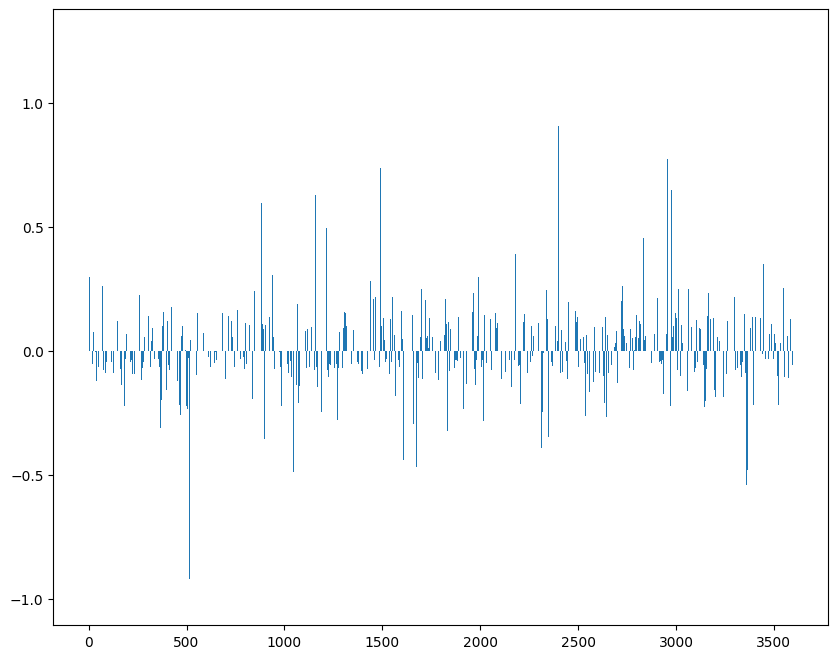

In [64]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])


In [65]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함


[(1.2644550507381784, 1217), (0.9079356150239054, 2400), (0.895609472071521, 1148), (0.8859075267474583, 2730), (0.8795111499693715, 43)]
[(-0.7201222787741571, 1310), (-0.7519681298547073, 3022), (-0.8672956005075484, 567), (-0.9190158099937462, 515), (-0.9945592515966042, 2143)]


In [66]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(1.2644550507381784, 1217),
 (0.9079356150239054, 2400),
 (0.895609472071521, 1148),
 (0.8859075267474583, 2730),
 (0.8795111499693715, 43),
 (0.8541915649753757, 26),
 (0.8362541212560807, 578),
 (0.7714811231976703, 2957),
 (0.7375280889735719, 1491),
 (0.7203390936359615, 956),
 (0.6503260268852225, 2977),
 (0.6488836121942874, 115),
 (0.6467914172687943, 910),
 (0.6264469987695738, 1159),
 (0.5943145305412953, 883),
 (0.5505354129422676, 2988),
 (0.5294632094678555, 692),
 (0.5240729254152496, 2455),
 (0.5207834696883534, 1922),
 (0.51539176484453, 2361),
 (0.49372825531123943, 1215),
 (0.4936086970700677, 246),
 (0.4854919888814008, 680),
 (0.48540863928594147, 269),
 (0.4748702738145659, 686),
 (0.4703566749364604, 1194),
 (0.45896954031613624, 790),
 (0.4558660002258446, 2834),
 (0.4537280028129353, 19),
 (0.45005407955814675, 2779),
 (0.444126715424079, 416),
 (0.44257202926523537, 1805),
 (0.4364684750426244, 263),
 (0.43085461242478346, 3267),
 (0.42558981165455323, 2797),
 

In [67]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer


{2866: '집중',
 3588: '휴식',
 2696: '제공',
 2311: '위치',
 1584: '선정',
 790: '또한',
 2927: '청소',
 2925: '청결',
 1527: '상태',
 2392: '이상',
 3022: '침대',
 2388: '이불',
 3021: '침구',
 299: '교체',
 2013: '어메니티',
 1296: '보강',
 1277: '베스트',
 2299: '웨스턴',
 3564: '회원',
 185: '경우',
 106: '객실',
 3009: '층수',
 2234: '요청',
 2606: '적극',
 1188: '반영',
 2837: '지인',
 1629: '소개',
 2910: '처음',
 611: '당황',
 1607: '세면',
 675: '도구',
 2555: '잠옷',
 3358: '필수',
 361: '그것',
 2673: '정도',
 578: '다음',
 2074: '여기',
 1171: '박만',
 2595: '저녁',
 981: '맥주',
 3414: '한잔',
 838: '렌트',
 791: '뚜벅',
 1159: '바로',
 1247: '버스',
 2676: '정류',
 697: '도착',
 24: '가방',
 2487: '일찍',
 2685: '정비',
 1225: '방이',
 2500: '입실',
 2038: '업그레이드',
 2849: '직원',
 2680: '정말',
 1148: '바다',
 2623: '전망',
 2636: '전일',
 3425: '함덕',
 624: '대명',
 3091: '콘도',
 1861: '실내',
 1384: '분위기',
 1659: '손님',
 40: '가장',
 1241: '배치',
 651: '대해',
 634: '대응',
 1889: '써비스',
 2730: '조식',
 1351: '부분',
 1838: '신경',
 1922: '아주',
 3208: '특급',
 3191: '트랜디',
 210: '고민',
 3593: '흔적',
 2082: '여

In [68]:
from wordcloud import WordCloud

(-0.5, 599.5, 599.5, -0.5)

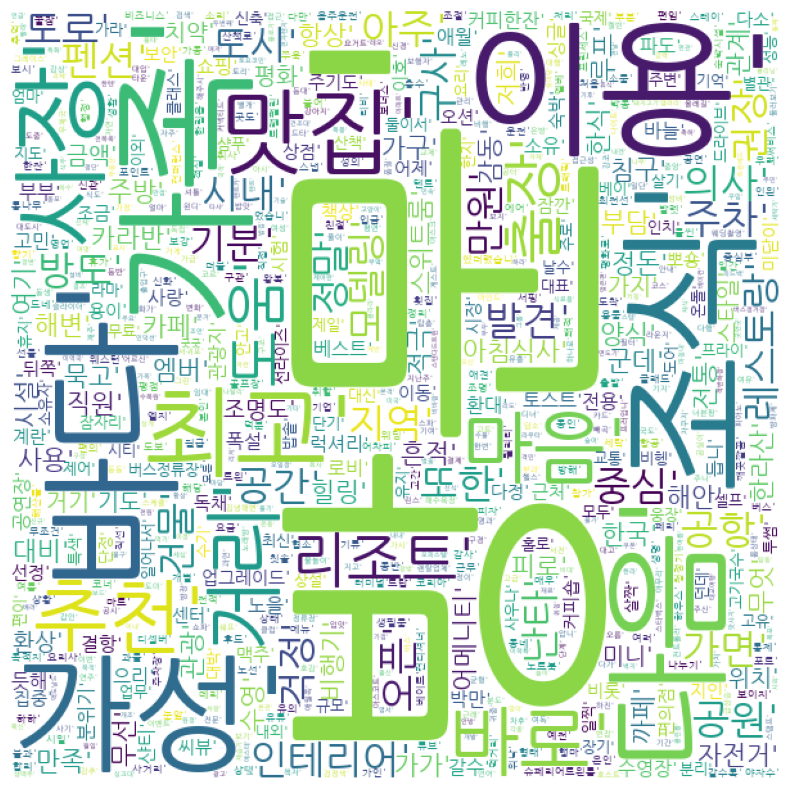

In [69]:
# 긍정 키워드 시각화

fontpath = 'C:/Windows/Fonts/NanumGothic.ttf'

positive_word = []
for coef in coef_pos_index: # 긍정 키워드 출력
    positive_word.append(invert_index_vectorizer[coef[1]])
wc = WordCloud(
    width = 600,
    height = 600,
    max_words=20000,
    font_path = fontpath,
    background_color='white'
).generate(str(positive_word))
plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')

In [70]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])


방문 1.2644550507381784
이용 0.9079356150239054
바다 0.895609472071521
조식 0.8859075267474583
가족 0.8795111499693715
가성 0.8541915649753757
다음 0.8362541212560807
최고 0.7714811231976703
사장 0.7375280889735719
맛집 0.7203390936359615
추천 0.6503260268852225
거리 0.6488836121942874
마음 0.6467914172687943
바로 0.6264469987695738
리조트 0.5943145305412953
출장 0.5505354129422676
도움 0.5294632094678555
인테리어 0.5240729254152496
아주 0.5207834696883534
의사 0.51539176484453


In [74]:
%matplotlib inline
coef_pos_index.plot()

AttributeError: 'list' object has no attribute 'plot'

(-0.5, 599.5, 599.5, -0.5)

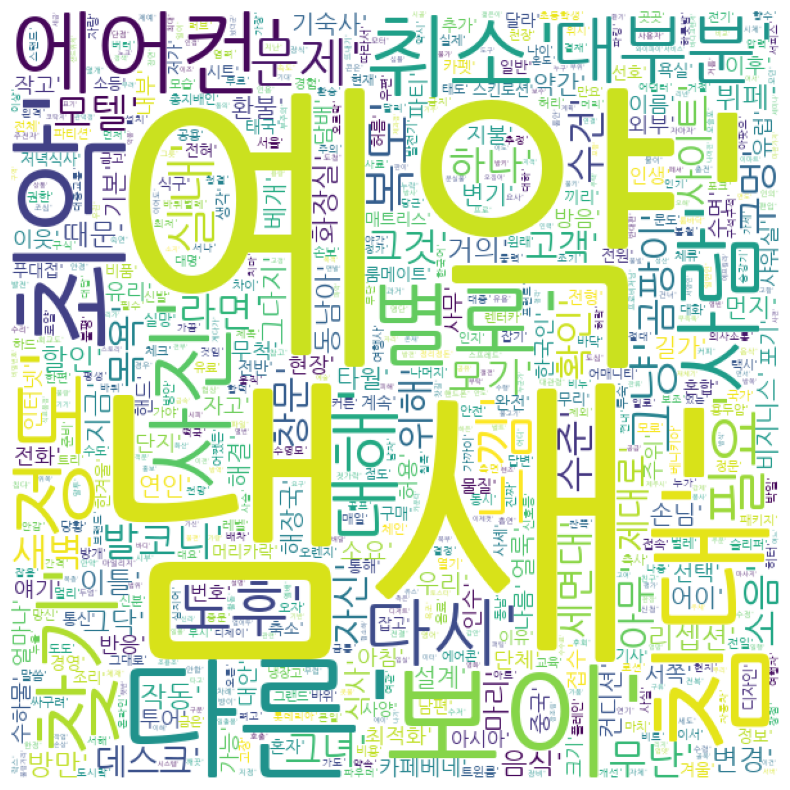

In [141]:
# 부정 키워드 시각화

negative_word = []
for coef in coef_neg_index:
    negative_word.append(invert_index_vectorizer[coef[1]])

wc = WordCloud(
width = 600,
height = 600,
max_words=20000,
font_path = fontpath,
background_color='white'
).generate(str(negative_word))
plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')

In [142]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

예약 -0.9945592515966042
냄새 -0.9190158099937462
다른 -0.8672956005075484
침대 -0.7519681298547073
보이 -0.7201222787741571
최악 -0.7142499739127353
에어컨 -0.6786616478611768
별로 -0.6742178511586063
찾기 -0.6584721911054097
취소 -0.6464141509409321
사람 -0.6451323735594593
정도 -0.6240099604615803
사진 -0.6089303470147719
대부분 -0.5889712626646347
다시 -0.5601302753897155
대해 -0.5518124209379022
노후 -0.5484791097700694
느낌 -0.5423970967095597
필요 -0.5413974621071781
문제 -0.5287746123667488
